Notebook by Jacqueline Lam

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [44]:
import pandas as pd
import numpy as np

import random
import os

# import tensorflow as tf
import torch
from transformers import BertTokenizer, BertModel

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier

import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

##Load Data

In [71]:
df = pd.read_pickle("/content/drive/My Drive/frugal_ai/Jacq/data_vector2.pkl")
df.head()

,quote,label,connection_index,type,set,vector_bert
0,"I, I’m not sure why, uh, people have tried to ...",0_not_relevant,1938,oga,train,"[[0.3192349, 0.37202504, 0.061069325, 0.142548..."
1,"Seldom, if ever, in Canadian history has so mu...",0_not_relevant,2975,oga,test,"[[-0.33194694, -0.11436532, -0.511136, -0.1179..."
2,What do you think? I’d say [I’ve been] a small...,0_not_relevant,6085,oga,test,"[[0.016604, 0.0834962, 0.19821484, -0.0579791,..."
3,"Really, given that God does judge nations, it’...",0_not_relevant,3212,oga,train,"[[0.12856574, 0.19278924, -0.29652733, -0.2343..."
4,"And then he met Meghan Markle, and it’s fallen...",0_not_relevant,5405,oga,train,"[[0.049800143, 0.08216716, 0.34868148, -0.0175..."


In [72]:
df.label.value_counts()

,count
label,
0_not_relevant,568
1_not_happening,568
2_not_human,568
3_not_bad,568
4_solutions_harmful_unnecessary,568
5_science_unreliable,568
6_proponents_biased,568
7_fossil_fuels_needed,568


In [74]:
df['vector'] = df.apply(lambda x: x['vector_bert'][0], axis=1)
df.head()

,quote,label,connection_index,type,set,vector_bert,vector
0,"I, I’m not sure why, uh, people have tried to ...",0_not_relevant,1938,oga,train,"[[0.3192349, 0.37202504, 0.061069325, 0.142548...","[0.3192349, 0.37202504, 0.061069325, 0.1425489..."
1,"Seldom, if ever, in Canadian history has so mu...",0_not_relevant,2975,oga,test,"[[-0.33194694, -0.11436532, -0.511136, -0.1179...","[-0.33194694, -0.11436532, -0.511136, -0.11793..."
2,What do you think? I’d say [I’ve been] a small...,0_not_relevant,6085,oga,test,"[[0.016604, 0.0834962, 0.19821484, -0.0579791,...","[0.016604, 0.0834962, 0.19821484, -0.0579791, ..."
3,"Really, given that God does judge nations, it’...",0_not_relevant,3212,oga,train,"[[0.12856574, 0.19278924, -0.29652733, -0.2343...","[0.12856574, 0.19278924, -0.29652733, -0.23433..."
4,"And then he met Meghan Markle, and it’s fallen...",0_not_relevant,5405,oga,train,"[[0.049800143, 0.08216716, 0.34868148, -0.0175...","[0.049800143, 0.08216716, 0.34868148, -0.01753..."


##Train, Test Split

In [75]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=123)

train_df.shape, test_df.shape

((3635, 7), (909, 7))

##Model: KNN

In [112]:
accuracy=[]

for i in range(1,101,2):

  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(list(train_df.vector), train_df.label)

  labels = test_df['label']
  pred_labels = knn.predict(list(test_df.vector))

  accuracy.append(sum(labels==pred_labels)/len(labels))

In [117]:
accuracy.index(max(accuracy))*2+1

27

In [118]:
knn = KNeighborsClassifier(n_neighbors=27)
knn.fit(list(train_df.vector), train_df.label)

KNeighborsClassifier(n_neighbors=27)

In [119]:
labels = test_df['label']
pred_labels = knn.predict(list(test_df.vector))

##Evaluation

In [120]:
#result
print(np.unique(labels))
print(np.unique(pred_labels))

['0_not_relevant' '1_not_happening' '2_not_human' '3_not_bad'
 '4_solutions_harmful_unnecessary' '5_science_unreliable'
 '6_proponents_biased' '7_fossil_fuels_needed']
['0_not_relevant' '1_not_happening' '2_not_human' '3_not_bad'
 '4_solutions_harmful_unnecessary' '5_science_unreliable'
 '6_proponents_biased' '7_fossil_fuels_needed']


Text(50.5815972222222, 0.5, 'True')

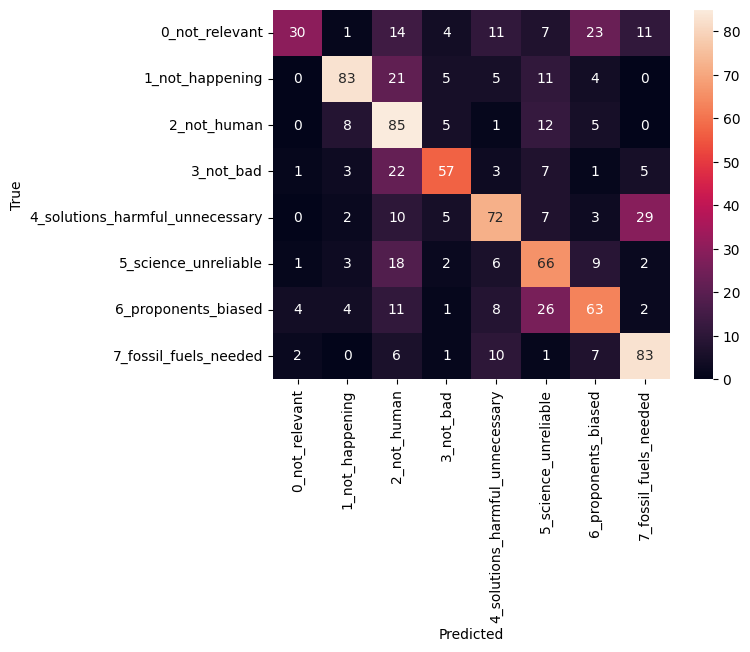

In [121]:
names=np.unique(labels)
cm = confusion_matrix(labels, pred_labels, labels=names)
sns.heatmap(
    cm,
    annot=True,
    fmt='g',
    xticklabels=names,
    yticklabels=names)
plt.xlabel("Predicted")
plt.ylabel("True")

In [122]:
print(classification_report(labels, pred_labels, target_names=names, digits=4))

                                 precision    recall  f1-score   support

                 0_not_relevant     0.7895    0.2970    0.4317       101
                1_not_happening     0.7981    0.6434    0.7124       129
                    2_not_human     0.4545    0.7328    0.5611       116
                      3_not_bad     0.7125    0.5758    0.6369        99
4_solutions_harmful_unnecessary     0.6207    0.5625    0.5902       128
           5_science_unreliable     0.4818    0.6168    0.5410       107
            6_proponents_biased     0.5478    0.5294    0.5385       119
          7_fossil_fuels_needed     0.6288    0.7545    0.6860       110

                       accuracy                         0.5930       909
                      macro avg     0.6292    0.5890    0.5872       909
                   weighted avg     0.6285    0.5930    0.5903       909

